## Set-up

In [1]:
import pandas as pd
import os
import sklearn
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append(os.path.dirname(os.getcwd()))


import data_utils
import network_calculations

Rtab_path="../../data/pangenomes/Campylobacter_coli/roary_pangenome/gene_presence_absence.Rtab"
pheno_path="../../data/phenotypes/Campylobacter_coli_ciprofloxacin.csv"

presence= data_utils.get_gene_presence_matrix(Rtab_path)
pheno = data_utils.get_pheno_df(pheno_path)

labeled_data = data_utils.get_labeled_matrix(presence, pheno)


/home/rayane/capstone-project/src/network_calculations.py:108: SyntaxWarning: invalid escape sequence '\o'
  '''


## Correlation Network

### Shell genes

<Axes: >

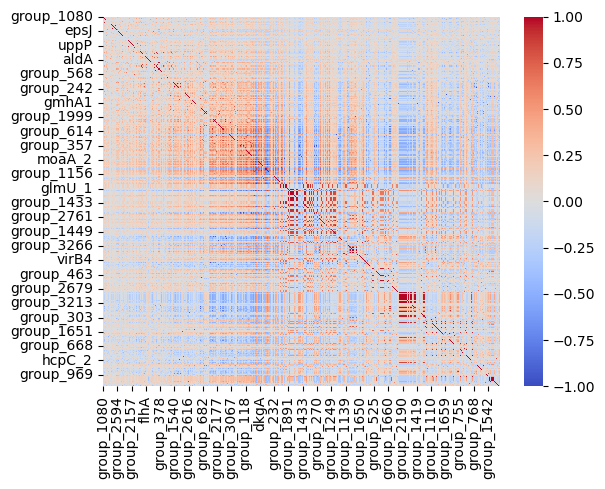

In [2]:
core = data_utils.get_core(presence, 0.95)
unique = data_utils.get_unique(presence, 0.15)

core_uniqe=core+unique

accessory = data_utils.get_presence_without_gene_set(presence, core_uniqe)
labeled_accessory = data_utils.get_labeled_matrix(accessory, pheno)
corr_accessory_gene = labeled_accessory.corr()

sns.heatmap(corr_accessory_gene, cmap="coolwarm", center=0)

#### Hard threshold

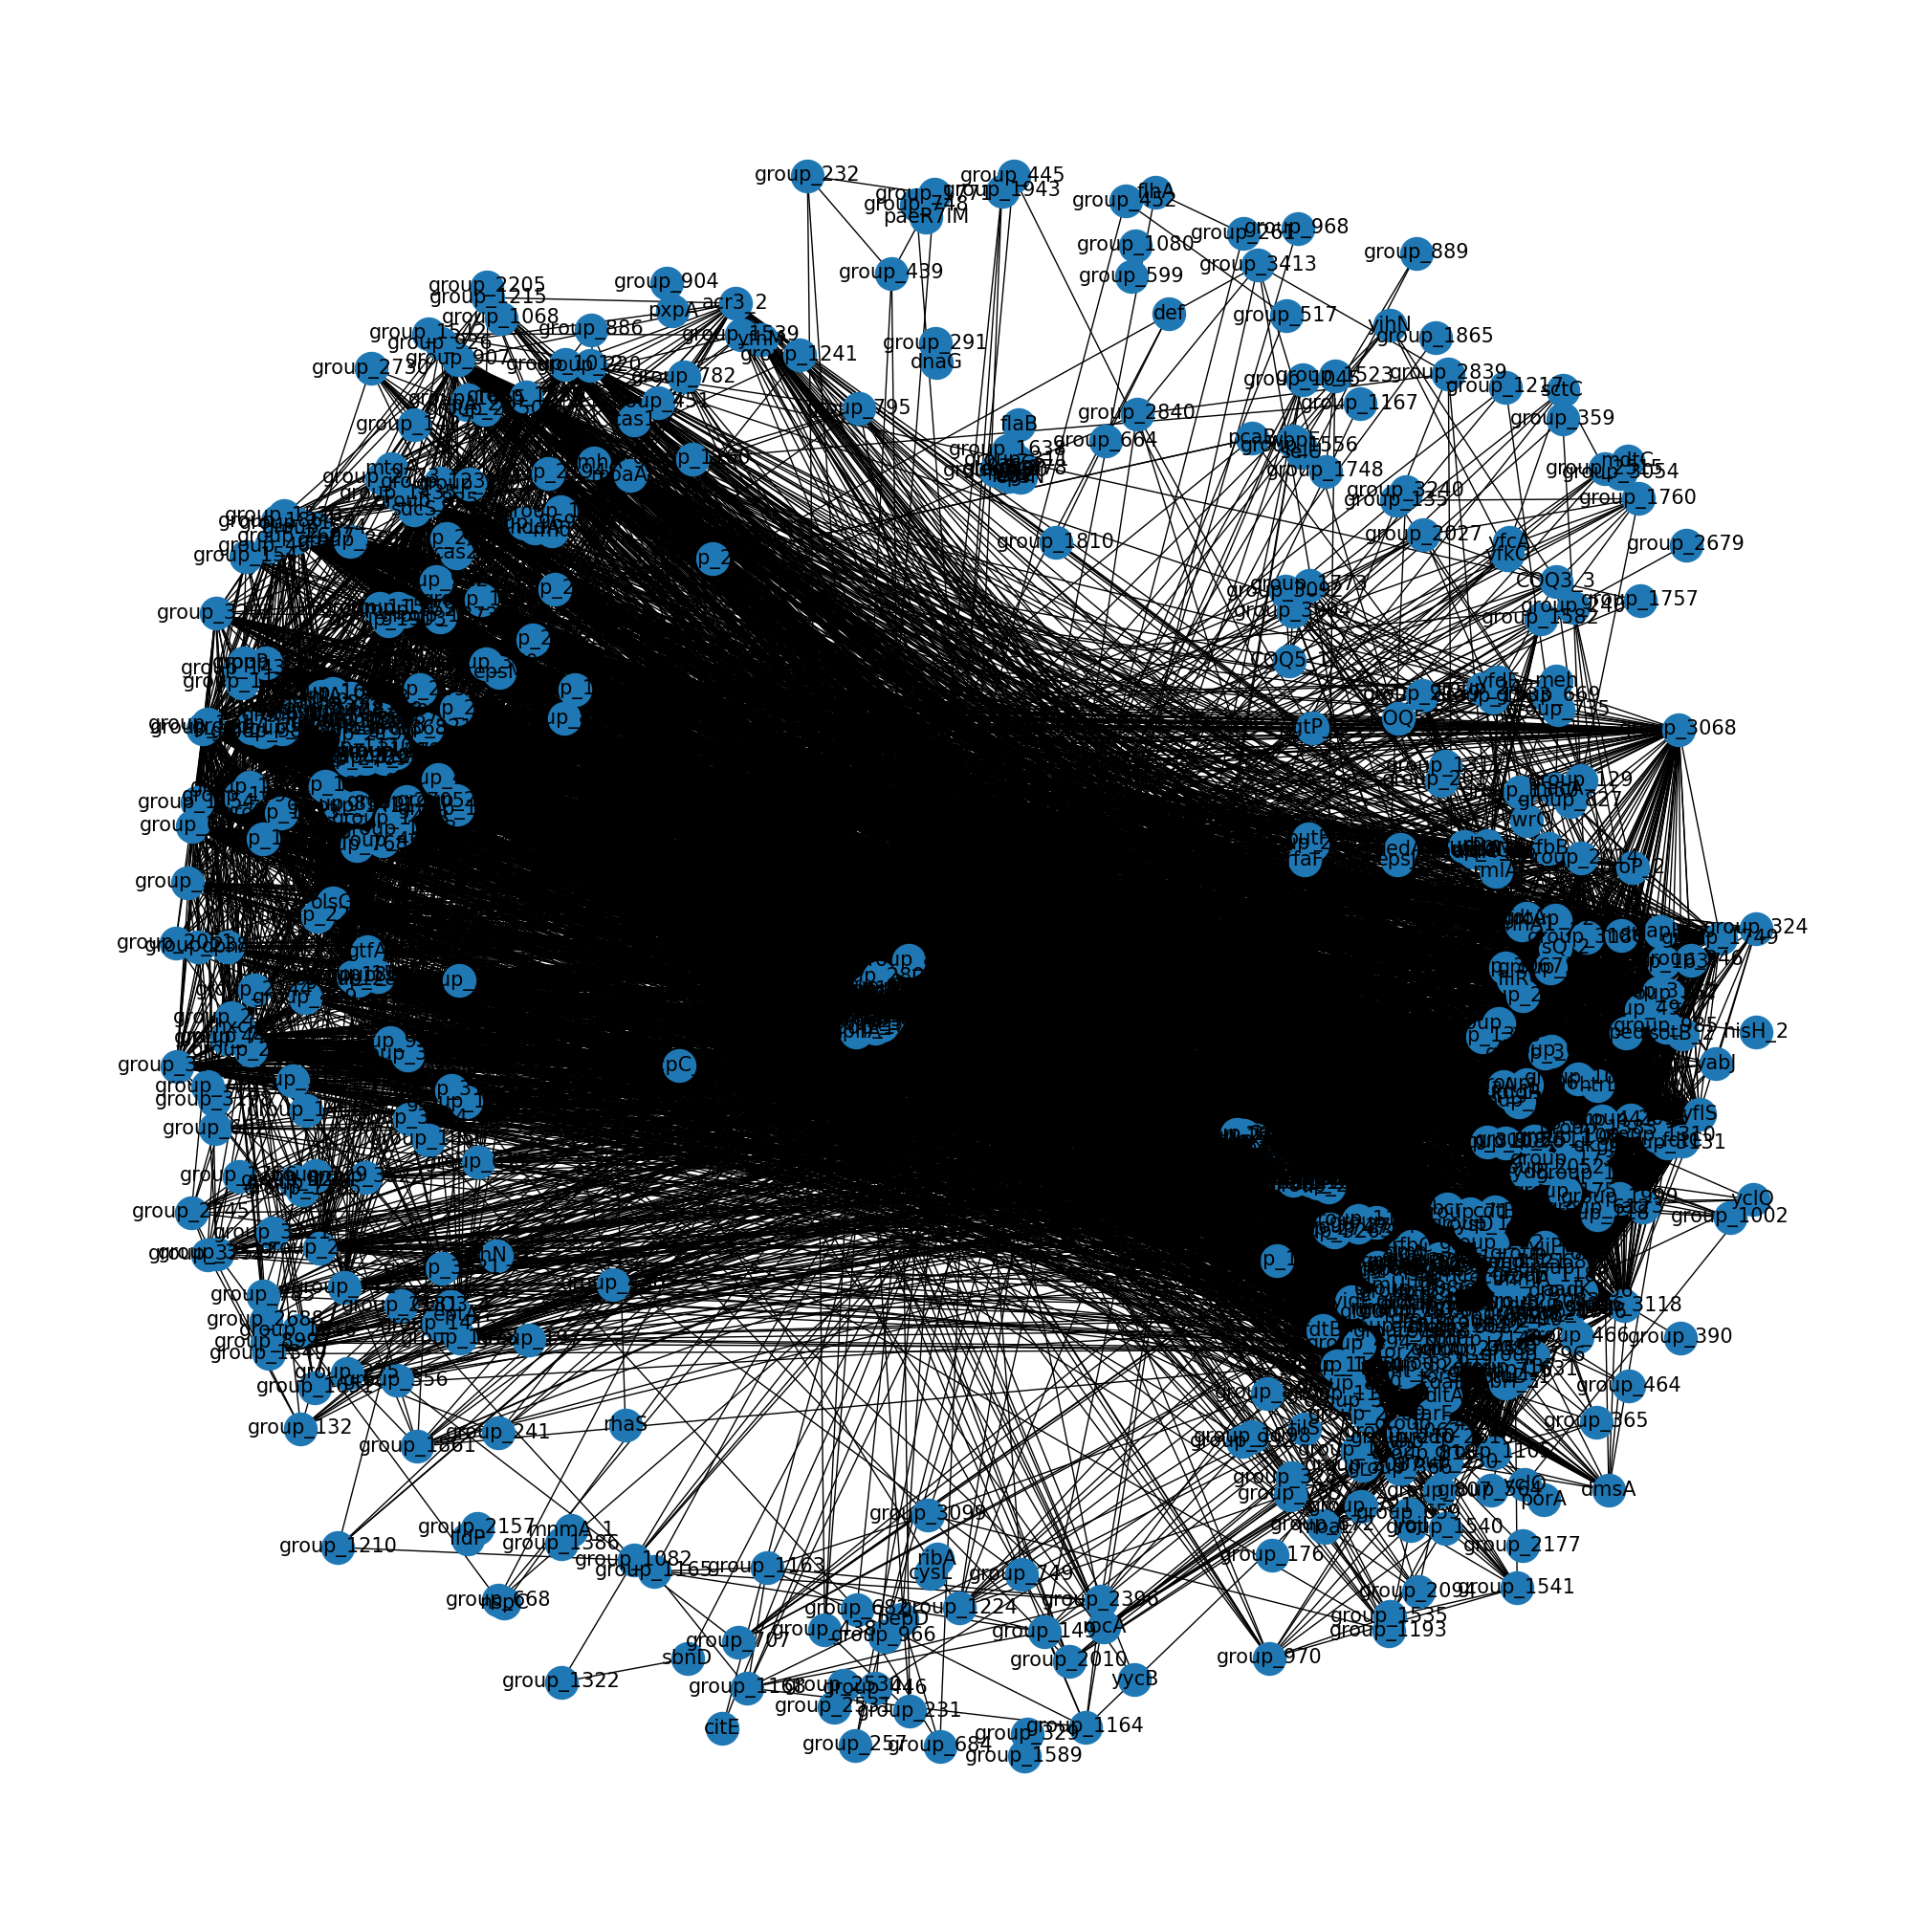

In [3]:
G = nx.Graph()
genes_num=corr_accessory_gene.shape[0]
for i in range(genes_num):
    for j in range(i+1, genes_num):
        if corr_accessory_gene.iloc[i,j] > 0.5 or corr_accessory_gene.iloc[i,j] < -0.5:
            G.add_edge(corr_accessory_gene.index[i], corr_accessory_gene.columns[j], weight=corr_accessory_gene.iloc[i,j])


layout=nx.spring_layout(G, seed=42)
plt.figure(figsize=(20, 20))
nx.draw(G, with_labels=True, pos=layout, node_size=600, font_size=15)

# nx.write_gml(G, "../../data/graphs/accessory_gene_correlation_C.coli_ciprofloxacin.gml")
# print(f"number of nodes: {G.number_of_nodes()}, number of edges: {G.number_of_edges()}")

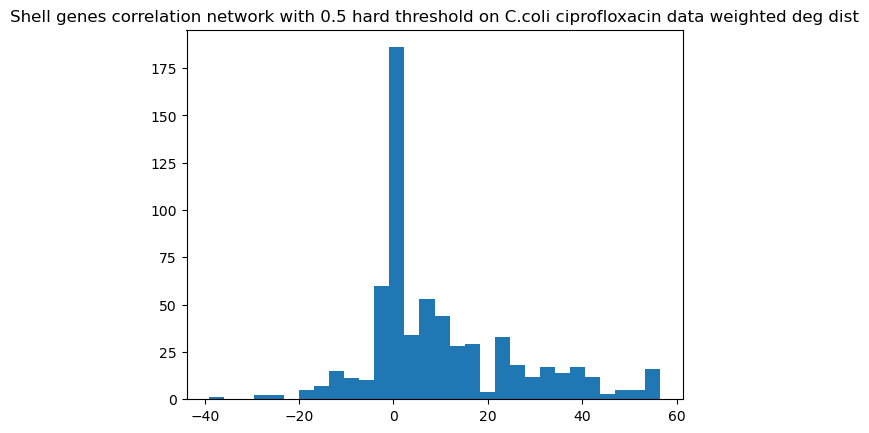

In [4]:
network_calculations.plot_degree_distribution(G, network_name="Shell genes correlation network with 0.5 hard threshold on C.coli ciprofloxacin data weighted deg dist", weighted=True)

In [7]:
network_calculations.get_network_stats(G, network_name="Shell genes correlation network with 0.5 hard threshold on C.coli ciprofloxacin data", weighted=True)

,|N|,|V|,Density,<k>,<k> weighted,<cc>,<spath>,d
Network,,,,,,,,
Shell genes correlation network with 0.5 hard threshold on C.coli ciprofloxacin data,643,11482,0.055629,35.713841,10.145719,0.695407,3.307834,12


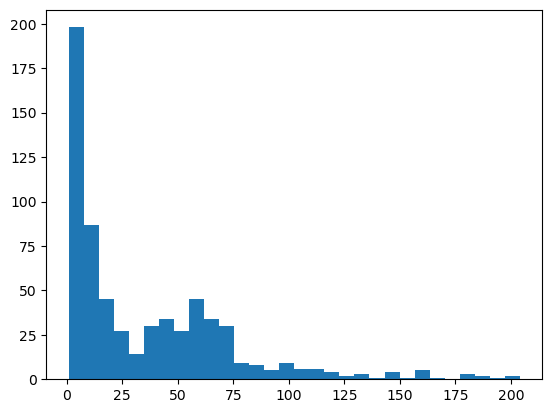

In [6]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, bins=30)
plt.show()

#### Soft-threshold

The soft-thresholding consists of finding the power of the adjacency matrix that best approximates the scale-free topology. The power is chosen by the function `pickSoftThreshold` from the WGCNA package. The function calculates the scale-free topology fit index for a range of powers and returns the power that best approximates the scale-free topology.